In [1]:
import tensorflow as tf
from keras import datasets, layers, models, Input
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"Training data shape = {X_train.shape}")
print(f"Training labels shape = {y_train.shape}")
print(f"Testing data shape = {X_test.shape}")
print(f"Testing labels shape = {y_test.shape}")

Training data shape = (60000, 28, 28)
Training labels shape = (60000,)
Testing data shape = (10000, 28, 28)
Testing labels shape = (10000,)


In [4]:
X_train.max()

np.uint8(255)

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
def subplt (rows, cols, img, label):
  plt_img = img[:rows*cols]
  plt.figure(figsize=(rows*2,cols*2))

  for i in range(len(plt_img)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(plt_img[i], cmap = 'gray')
    plt.title(label[i])
    plt.axis('off')

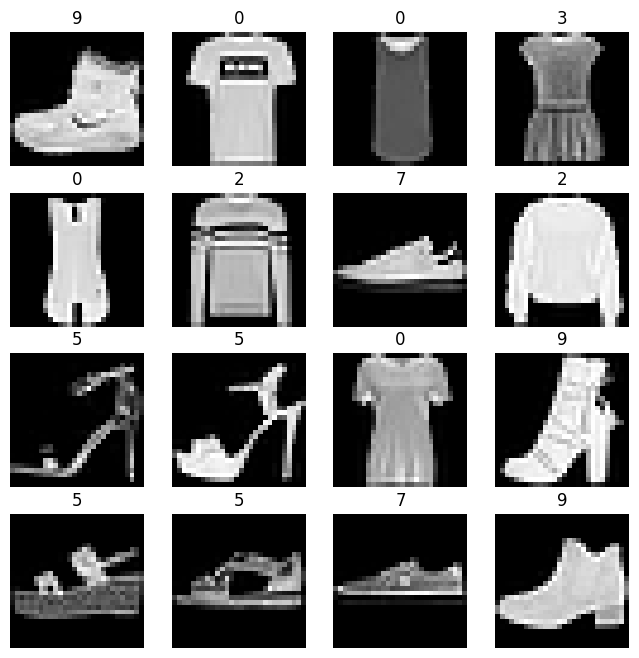

In [7]:
subplt(4,4,X_train,y_train)

In [25]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

## MLP Model

In [8]:
# Build the CNN model
mlp_model = models.Sequential([
    Input(shape=(28, 28, 1)),

    layers.Flatten(),

    layers.Dropout(0.2),
    layers.Dense(512),
    layers.LeakyReLU(negative_slope=0.01),

    layers.Dropout(0.2),
    layers.Dense(256),
    layers.LeakyReLU(negative_slope=0.01),

    layers.Dropout(0.2),
    layers.Dense(128),
    layers.LeakyReLU(negative_slope=0.01),

    layers.Dropout(0.2),
    layers.Dense(64),
    layers.LeakyReLU(negative_slope=0.01),

    layers.Dropout(0.2),

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
mlp_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=512)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.5480 - loss: 1.2562 - val_accuracy: 0.8280 - val_loss: 0.4974
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8005 - loss: 0.5648 - val_accuracy: 0.8419 - val_loss: 0.4355
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8266 - loss: 0.4850 - val_accuracy: 0.8579 - val_loss: 0.3918
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8450 - loss: 0.4353 - val_accuracy: 0.8642 - val_loss: 0.3766
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8466 - loss: 0.4258 - val_accuracy: 0.8706 - val_loss: 0.3580
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8557 - loss: 0.3990 - val_accuracy: 0.8721 - val_loss: 0.3505
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8598 - loss: 0.3877 - val_accuracy: 0.8809 - val_loss: 0.3342
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8643 - loss: 0.3723 - val_accuracy: 0.8789 - val_los

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = mlp_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8792 - loss: 0.3255
Test accuracy: 0.8813999891281128
Loss: 0.3265763819217682


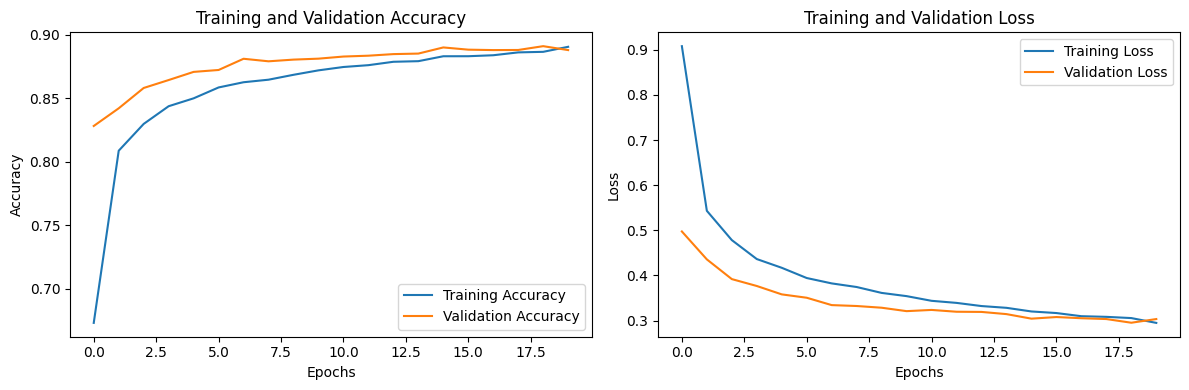

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


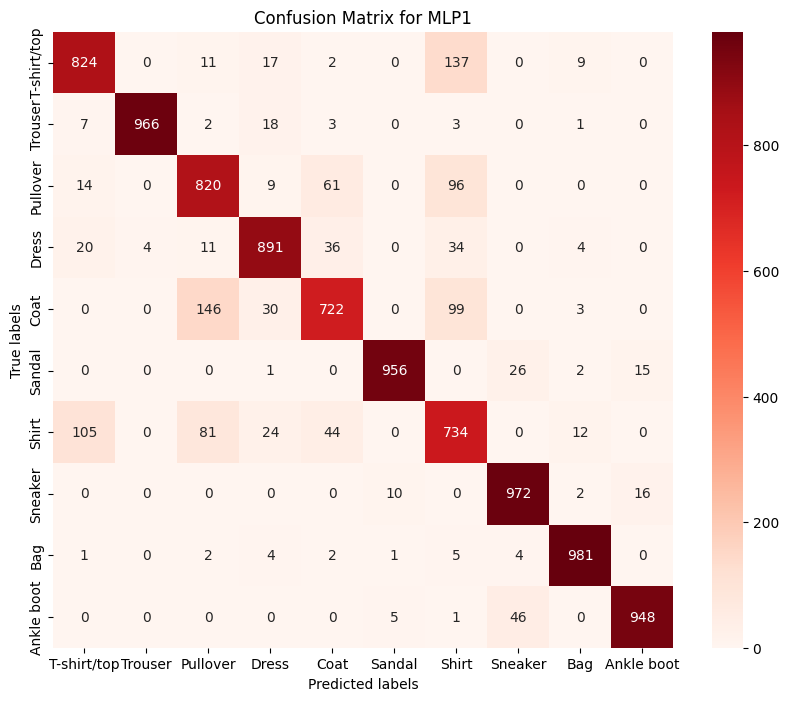

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute predictions
predictions = mlp_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MLP1')
plt.show()

## CNN Model

In [37]:
# Build the CNN model
model = models.Sequential([
    Input(shape=(28, 28, 1)),  # Use Input layer for the input shape

    layers.Conv2D(32, (3, 3)),
    layers.LeakyReLU(negative_slope=0.01),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(negative_slope=0.01),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3)),
    layers.LeakyReLU(negative_slope=0.01),

    # Flatten the results to feed into the fully connected layers
    layers.Flatten(),
    layers.Dropout(0.2),

    layers.Dense(128),
    layers.LeakyReLU(negative_slope=0.01),
    layers.Dropout(0.2),

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the model
history1 = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=512)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5376 - loss: 1.3016 - val_accuracy: 0.7943 - val_loss: 0.5381
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7996 - loss: 0.5299 - val_accuracy: 0.8457 - val_loss: 0.4254
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8409 - loss: 0.4350 - val_accuracy: 0.8658 - val_loss: 0.3709
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8622 - loss: 0.3803 - val_accuracy: 0.8730 - val_loss: 0.3441
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8725 - loss: 0.3460 - val_accuracy: 0.8830 - val_loss: 0.3264
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8845 - loss: 0.3198 - val_accuracy: 0.8862 - val_loss: 0.3061
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8904 - loss: 0.2991 - val_accuracy: 0.8933 - val_loss: 0.2894
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8967 - loss: 0.2848 - val_accuracy: 0.8975 - v

In [40]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9117 - loss: 0.2499
Test accuracy: 0.9133999943733215
Loss: 0.24194389581680298


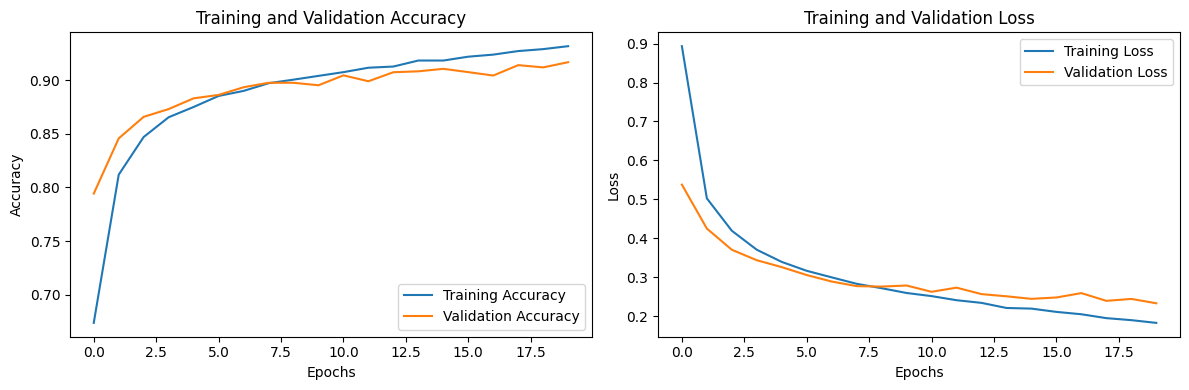

In [41]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


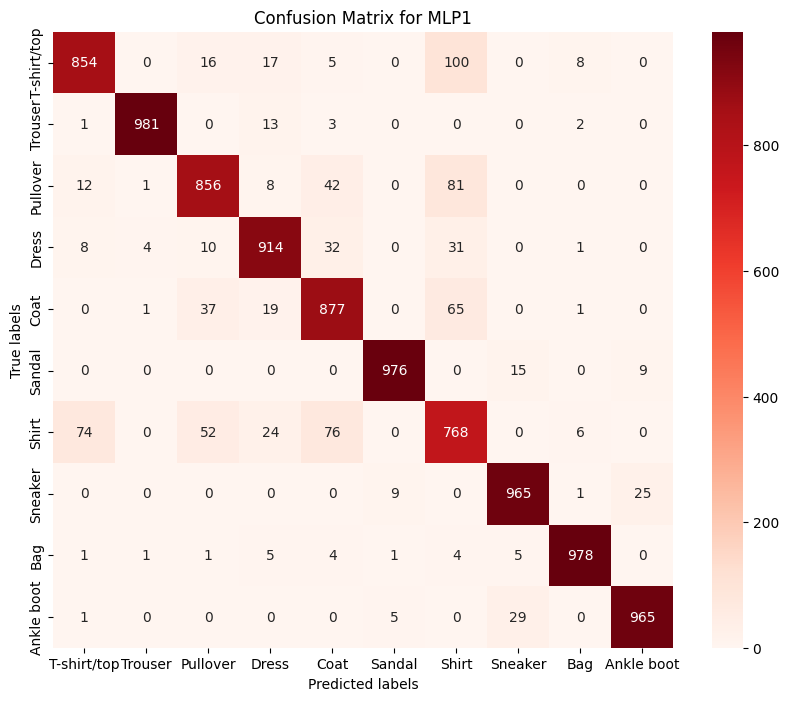

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MLP1')
plt.show()